In [1]:
import itertools
import random

%matplotlib inline
import networkx as nx

In [3]:
p = 0.5

for _ in range(10):
    r = random.random()
    if r < p:
        print('Heads')
    else:
        print('Tails')

Heads
Tails
Heads
Heads
Heads
Tails
Tails
Heads
Tails
Heads


In [7]:
names = ['Alfyad', 'Omar', 'Ali', 'Mahmoud']
random.choice(names)

'Alfyad'

In [8]:
G = nx.cycle_graph(5)
random.sample(G.nodes, 2)

C:\Users\THEGEN~1\AppData\Local\Temp/ipykernel_20824/1435685415.py:2: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  random.sample(G.nodes, 2)


[2, 1]

In [12]:
names = ['Alfyad', 'Omar', 'Ali', 'Mahmoud']
tickets = [1,2,3,4]
for _ in range(10):
    print(random.choices(names, tickets))

['Mahmoud']
['Omar']
['Alfyad']
['Ali']
['Mahmoud']
['Alfyad']
['Mahmoud']
['Ali']
['Ali']
['Mahmoud']


In [13]:
random.choices(names, tickets, k=10)

['Mahmoud',
 'Mahmoud',
 'Mahmoud',
 'Mahmoud',
 'Alfyad',
 'Mahmoud',
 'Mahmoud',
 'Omar',
 'Ali',
 'Ali']

In [14]:
elements = [0, 1, 2, 3, 4]
list(itertools.combinations(elements, 2))

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 3),
 (2, 4),
 (3, 4)]

In [15]:
G = nx.Graph()
G.add_nodes_from(elements)

list(itertools.combinations(G.nodes, 2))

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 3),
 (2, 4),
 (3, 4)]

In [16]:
def gnp_random_graph(N, p):
    G = nx.Graph()
    G.add_nodes_from(range(N))
    
    for i, j in itertools.combinations(G.nodes, 2):
        r = random.random()
        if r < p:
            G.add_edge(i, j)
            
    return G

Graph has 16 edges.


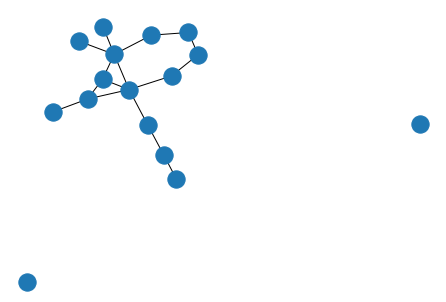

In [19]:
G = gnp_random_graph(16, 0.15)
nx.draw(G)
print('Graph has', G.number_of_edges(), 'edges.')

In [20]:
def gnm_random_graph(N, M):
    G = nx.Graph()
    G.add_nodes_from(range(N))
    
    possible_edges = itertools.combinations(G.nodes, 2)
    edges_to_add = random.sample(list(possible_edges), M)
    G.add_edges_from(edges_to_add)
    
    return G

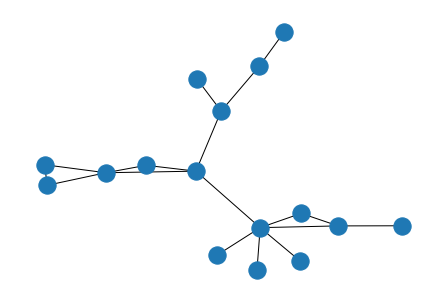

In [21]:
G = gnm_random_graph(16, 18)
nx.draw(G)

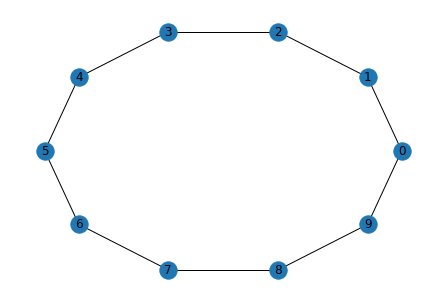

In [22]:
N = 10
G = nx.cycle_graph(N)
nx.draw_circular(G, with_labels=True)

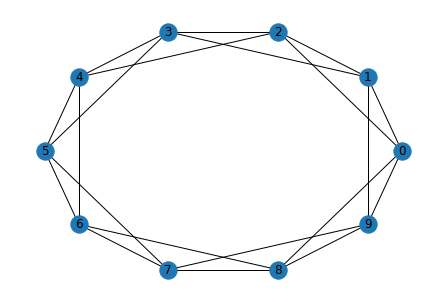

In [23]:
k = 4

for n in G.nodes:
    for i in range(1, k // 2 + 1):
        left  = (n-i) % N
        right = (n+i) % N 
        G.add_edge(n, left)
        G.add_edge(n, right)

nx.draw_circular(G, with_labels=True)

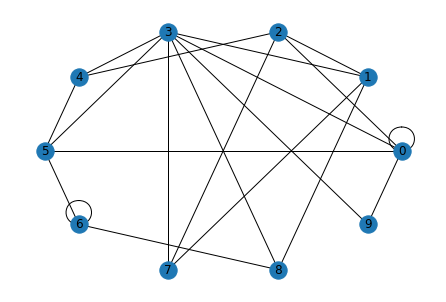

In [25]:
p = 0.5

for u, v in list(G.edges):
    if random.random() < p:
        not_neighbors = set(G.nodes) - set(G.neighbors(u))
        w = random.choice(list(not_neighbors))
        G.remove_edge(u, v)
        G.add_edge(u, w)

nx.draw_circular(G, with_labels=True)

In [26]:
def watts_strogatz_graph(N, k, p):
    G = nx.cycle_graph(N)

    for n in G.nodes:
        for i in range(1, k // 2 + 1):
            left  = (n-i) % N
            right = (n+i) % N 
            G.add_edge(n, left)
            G.add_edge(n, right)
    
    for u, v in list(G.edges):
        if random.random() < p:
            not_neighbors = set(G.nodes) - set(G.neighbors(u)) - {u}
            w = random.choice(list(not_neighbors))
            G.remove_edge(u, v)
            G.add_edge(u, w)

    return G

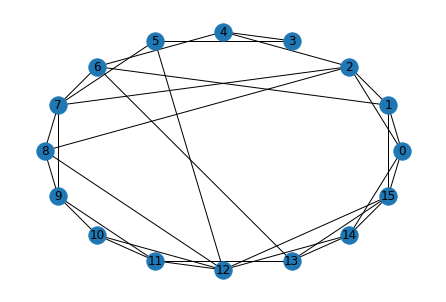

In [27]:
G = watts_strogatz_graph(16, 4, 0.2)
nx.draw_circular(G, with_labels=True)

[4, 1, 1, 1, 1]


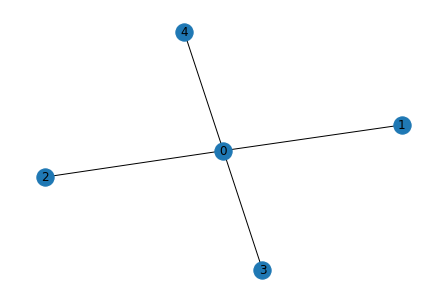

In [28]:
G = nx.star_graph(4)
degrees = [G.degree(n) for n in G.nodes]

print(degrees)
nx.draw(G, with_labels=True)

In [29]:
def barabasi_albert_graph(N, m):
    G = nx.complete_graph(m + 1)
    for i in range(G.number_of_nodes(), N):
        new_neighbors = []
        possible_neighbors = list(G.nodes)
        for _ in range(m):
            degrees = [G.degree(n) for n in possible_neighbors]
            j = random.choices(possible_neighbors, degrees)[0]
            new_neighbors.append(j)
            possible_neighbors.remove(j)
        
        for j in new_neighbors:
            G.add_edge(i, j)

    return G

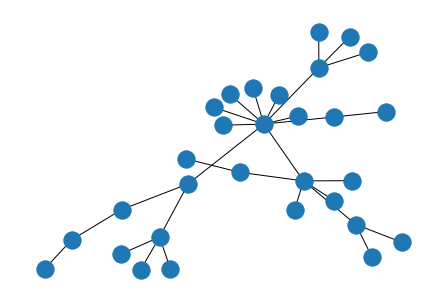

In [30]:
G = barabasi_albert_graph(30, 1)
nx.draw(G)